In [1]:
import numpy as np
import pandas as pd

from __future__ import division
import itertools

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns
%matplotlib inline

import math
from sklearn import metrics
from random import randint

### Explore these logs of access to Codeup Curriculum: Ask pointed questions utilizing the Data Science Pipeline and see what you can find that interests you about this data!

Ideas:
- Can you label students who are viewing both the web dev and data science curriculum?
- Can you label students by the program they are in?
- Can you label users by student vs. staff?
- What are Zach, Maggie, Faith, and Ryan's ids?

## Acquire

In [2]:
#sep=' ' adds a separator btwn strings being printed
#header=None tells pandas that source data has no row for headers/col titles.
logs = pd.read_csv('anonymized-curriculum-access.txt', sep=' ', header=None)
logs.head()

,0,1,2,3,4,5
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
#check out rows/cols
logs.shape

(900223, 6)

In [4]:
logs[2].value_counts().head(50)

/                                                                            50313
search/search_index.json                                                     19519
javascript-i                                                                 18983
toc                                                                          18297
java-iii                                                                     13733
html-css                                                                     13635
java-ii                                                                      12685
spring                                                                       12524
jquery                                                                       11525
mysql                                                                        11033
java-i                                                                       10865
javascript-ii                                                                10730
appe

In [5]:
logs[2].value_counts().tail(50)

8-timeseries/1-overview                          1
storytelling/creating-custom-fields.md           1
itc-ml                                           1
content/appendix/control-structures.html         1
imports                                          1
12-distributed-ml/6.1-prepare-part-1             1
content/examples/php/while.html                  1
student/create                                   1
javascript-functions                             1
java-iii/mvc/java-beans/'                        1
10.00_Intro.html                                 1
4-stats/2.6-compare-means                        1
interview                                        1
java-1                                           1
sgithubtudents/1215                              1
python/introduction-to-python.md                 1
creating-charts                                  1
javascript-i/dom                                 1
appendix/cli/2-Overview                          1
content/examples/php/Input.php 

In [6]:
logs[3].value_counts().head(50)

11     17913
64     16347
53     12329
314     7783
1       7404
495     6451
581     6434
428     5897
344     5460
248     5075
570     4584
315     4510
211     4227
423     3804
555     3687
545     3528
685     3522
524     3512
485     3268
671     3241
346     3182
566     3163
521     3052
595     3050
760     3019
764     2975
354     2965
823     2946
323     2933
419     2877
120     2870
794     2852
430     2811
599     2711
127     2687
613     2685
410     2650
531     2632
418     2598
546     2585
656     2570
437     2523
640     2472
186     2450
627     2439
433     2428
748     2399
608     2387
834     2379
277     2367
Name: 3, dtype: int64

In [7]:
logs[4].value_counts().sort_values()

5.0          1
4.0          4
9.0          5
6.0         72
2.0         93
11.0       253
12.0       302
7.0        598
15.0       691
16.0       755
19.0      1237
139.0     1672
8.0       1712
18.0      2158
13.0      2845
17.0      4954
138.0     7276
21.0      7444
137.0     8562
1.0       8890
14.0      9587
133.0    14715
135.0    16397
134.0    16623
61.0     17713
27.0     20743
55.0     21582
132.0    23691
31.0     25359
25.0     25586
34.0     26538
26.0     27749
52.0     28033
23.0     28534
32.0     29356
58.0     29855
22.0     30926
59.0     32015
51.0     32888
56.0     33568
57.0     33844
24.0     35636
53.0     36902
62.0     37109
29.0     38096
33.0     40730
28.0     84031
Name: 4, dtype: int64

In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       900223 non-null  object 
 1   1       900223 non-null  object 
 2   2       900222 non-null  object 
 3   3       900223 non-null  int64  
 4   4       847330 non-null  float64
 5   5       900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [9]:
logs.isnull().sum()

0        0
1        0
2        1
3        0
4    52893
5        0
dtype: int64

### Takeaways
- Need to rename columns:
    - col 0 is date
    - col 1 is time
    - col 2 looks like endpoint to base url (web_page?)
    - col 3 could be user_id because there are more students than cohorts
    - 4 to cohort_id because there are less cohorts than students?
    - 5 is ip_address
- date needs to be converted to datetime dtype and set as index (could also combine time col into here)
- 1 null in web_page and tons of nulls in cohort_id.. not sure why. 
    - web_page null can be deleted and cohort_id nulls can be filled w/ 0's.


## Prepare

In [10]:
#name columns
logs.columns = ['date', 'time', 'web_page', 'user_id', 'cohort_id', 'ip']

#combine date and time columns, convert to datetime and set as index
logs["datetime"] = logs["date"] + ' '+ logs["time"]
logs['datetime'] = pd.to_datetime(logs.datetime)
logs = logs.set_index('datetime')

#drop original date and time columns
logs.drop(columns=['date', 'time'], inplace = True)

logs.head()

,web_page,user_id,cohort_id,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


## Acquire from SQL Ace

In [11]:
import env
from env import host, user, password

In [12]:
#defines function to create a sql url using personal credentials
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'



#returns logs data from MySQL db as a pandas df
def get_logs():
    '''
    This function reads in the logs data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    #create SQL query
    sql_query = 'SELECT * FROM logs LEFT JOIN cohorts ON cohorts.id = logs.cohort_id'
    
    #read in dataframe from Codeup db
    df = pd.read_sql(sql_query, get_connection('curriculum_logs'))
    
    return df

In [13]:
df = get_logs()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


## Prepare again

In [15]:
#combine date and time columns, convert to datetime and set as index
df["datetime"] = df["date"] + ' '+ df["time"]
df['datetime'] = pd.to_datetime(df.datetime)
df = df.set_index('datetime')

#drop original date and time columns
df.drop(columns=['date', 'time'], inplace = True)

df.head()

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
datetime,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   id          847330 non-null  float64
 5   name        847330 non-null  object 
 6   slack       847330 non-null  object 
 7   start_date  847330 non-null  object 
 8   end_date    847330 non-null  object 
 9   created_at  847330 non-null  object 
 10  updated_at  847330 non-null  object 
 11  deleted_at  0 non-null       object 
 12  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 96.2+ MB


In [17]:
#checking nulls
df.isnull().sum()

path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64

In [18]:
#drop unnecessary / repeated  cols
df = df.drop(columns = ['id', 'slack', 'deleted_at', 'program_id'])

#filling remaining nulls
df = df.fillna(0)

df.isnull().sum()

path          0
user_id       0
cohort_id     0
ip            0
name          0
start_date    0
end_date      0
created_at    0
updated_at    0
dtype: int64

## Explore

In [19]:
#look at value_counts() in dataset
for col in df.columns:
    print(col)
    print(df[col].value_counts())

path
/                                           50313
search/search_index.json                    19519
javascript-i                                18983
toc                                         18297
java-iii                                    13733
                                            ...  
content/appendix/control-structures.html        1
grades/getUserDetails/912/3                     1
11-distributed-ml/3-getting-started             1
tools/codeup                                    1
0                                               1
Name: path, Length: 2314, dtype: int64
user_id
11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
952        1
212        1
940        1
649        1
879        1
Name: user_id, Length: 981, dtype: int64
cohort_id
28.0     84031
0.0      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     

In [20]:
#check for anomalies in easley cohort
easley = df[df.name == 'Easley']
easley.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at
datetime,,,,,,,,,
2020-12-08 10:49:37,/,835,133.0,173.173.109.5,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18
2020-12-08 10:49:39,/,836,133.0,99.43.137.186,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18
2020-12-08 10:49:40,/,837,133.0,66.69.79.82,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18
2020-12-08 10:49:52,/,838,133.0,99.158.249.67,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18
2020-12-08 10:50:16,/,839,133.0,130.45.49.89,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18


In [21]:
#how many user_id's in easley?
easley.user_id.value_counts().count()

17

<AxesSubplot:>

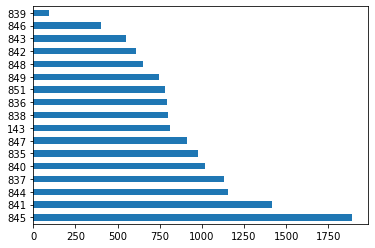

In [22]:
#plot how much easley students access curric
easley.user_id.value_counts().plot(kind = 'barh')

### Findings
- 1 user_id looks very odd (143)
- user_id 839 accesses curric very seldomly while 845 accesses curric very often.

<AxesSubplot:ylabel='hour'>

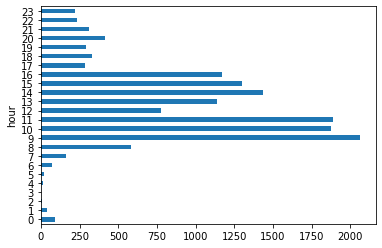

In [29]:
#creating hour col and plotting data to see what hours easley is accessing curric
easley['hour'] = easley.index.hour

easley.groupby('hour')['user_id'].count().plot(kind = 'barh')

### Findings
- some users are accessing curriculum at early morning/late evenings.